In [1]:
# %load simulations
from TreeClassifier import *
from TreeHardClassifier import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn import svm
import numpy as np
import datetime
import os

In [2]:
# def generate_data(n,d):
#     X = np.random.normal(size=[n, d])
#     row_squared_sums = np.reshape(np.sqrt(np.square(X).sum(axis=1)), (-1, 1))
#     X = np.divide(X, row_squared_sums)
#     w = np.random.normal(size=[2, d])
#     row_squared_sums = np.reshape(np.sqrt(np.square(w).sum(axis=1)), (-1, 1))
#     w = np.divide(w, row_squared_sums)
#     y1 = np.dot(X,np.transpose(w[0,:]))
#     y2 = np.dot(X,np.transpose(w[1,:]))
#     y = np.multiply(y1, y2)
#     y = np.greater(y,0.0).reshape(-1)
# #     print y.shape
#     return X,y

In [3]:
def generate_data(n,d):
    X = np.random.normal(size=[n, d])
    row_squared_sums = np.reshape(np.sqrt(np.square(X).sum(axis=1)), (-1, 1))
    X = np.divide(X, row_squared_sums)
    y = np.dot(X,np.ones((d,1)))
    other_direction = np.concatenate([np.ones((d/2,1)), -1*np.ones((d/2,1))], axis=0)
    y = np.multiply(y, np.dot(X,other_direction))
    y = np.greater(y,0.0).reshape(-1)
#     print y.shape
    return X,y

In [4]:
# def generate_data(n,d):
#     X = np.random.normal(size=[n, d])
#     row_squared_sums = np.reshape(np.sqrt(np.square(X).sum(axis=1)), (-1, 1))
#     X = np.divide(X, row_squared_sums)
# #     print X.shape
#     slice_x = X[:,0:2]
# #     print slice_x.shape
#     rotation = np.sqrt(0.5) * np.array([[1.0,-1.0],[1.0,1.0]])
# #     print rotation
#     slice_x = np.dot(slice_x,rotation)
#     y = np.greater(np.multiply(slice_x[:,0], slice_x[:,1]).reshape(-1),0.0)
# #     print y.shape
#     return X,y

In [5]:
n = 10000
d = 8

def manage_run(n,d):
    X,y = generate_data(n,d)
    maj = y.sum()/float(len(y))
    maj = np.max([maj,1-maj])
    print "majority"
    print maj
    
    svm_scores = cross_val_score(LinearSVC(fit_intercept=True), X, y, cv=5)
    print "svm"
    print svm_scores
    print svm_scores.mean()
    
#     stochastic_scores = cross_val_score(TreeClassifier(normalizer_mode='no', number_of_iterations=10, print_debug=False, fit_full_tree=True), X, y, cv=5)
    stochastic_scores = cross_val_score(TreeClassifier(normalizer_mode='no', number_of_iterations=80, print_debug=False, fit_full_tree=False), X, y, cv=5)
    print "stochasic"
    print stochastic_scores
    print stochastic_scores.mean()
        
    tree_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=10), X, y, cv=5)
    print "regular"
    print tree_scores
    print tree_scores.mean()
    
    return maj, svm_scores, stochastic_scores, tree_scores

In [6]:
n = 10000
d_range = [(1+i)*2 for i in range(2,15)]

# maj = {}
svm_scores_means = {}
stochastic_scores_means = {}
tree_scores_means = {}

for d in d_range:
    print d
    svm_scores_means[d] = []
    stochastic_scores_means[d] = [] 
    tree_scores_means[d] = []
    for i in range(3):
        _, svm_scores, stochastic_scores, tree_scores = manage_run(n,d)
        svm_scores_means[d] = svm_scores if i ==0 else np.concatenate([svm_scores_means[d],svm_scores])
        stochastic_scores_means[d] = stochastic_scores if i ==0 else np.concatenate([stochastic_scores_means[d],
                                                                                     stochastic_scores])
        tree_scores_means[d] = tree_scores if i ==0 else np.concatenate([tree_scores_means[d],tree_scores])
    print ''

6
majority
0.505
svm
[ 0.484   0.4875  0.487   0.504   0.5085]
0.4942
just bias
just bias
just bias
just bias
just bias
stochasic
[ 0.808   0.7995  0.815   0.813   0.7775]
0.8026
regular
[ 0.7425  0.7515  0.7355  0.762   0.7485]
0.748
majority
0.5004
svm
[ 0.50574713  0.494       0.506       0.4825      0.51725863]
0.50110115115
just bias
just bias
just bias
just bias
just bias
stochasic
[ 0.78710645  0.7755      0.8325      0.877       0.77438719]
0.809298728075
regular
[ 0.75212394  0.7485      0.741       0.7395      0.74787394]
0.745799575
majority
0.5001
svm
[ 0.49025487  0.509       0.5045      0.5125      0.50475238]
0.50420144975
just bias
just bias
just bias
just bias
just bias
stochasic
[ 0.75762119  0.752       0.7585      0.745       0.91895948]
0.786416133829
regular
[ 0.74462769  0.742       0.738       0.7395      0.76438219]
0.74570197545

8
majority
0.5037
svm
[ 0.50224888  0.49275362  0.485       0.51575788  0.49974987]
0.499102050526
just bias
just bias
just bias
jus

In [7]:
# n = 10000
# d_range = [(1+i)*2 for i in range(2,15)]

# maj = {}
# svm_scores_means = {}
# stochastic_scores_means = {}
# tree_scores_means = {}

# for d in d_range:
#     print d
#     maj[d], svm_scores_means[d], stochastic_scores_means[d], tree_scores_means[d] = manage_run(n,d)
#     print ''

In [8]:
%matplotlib inline

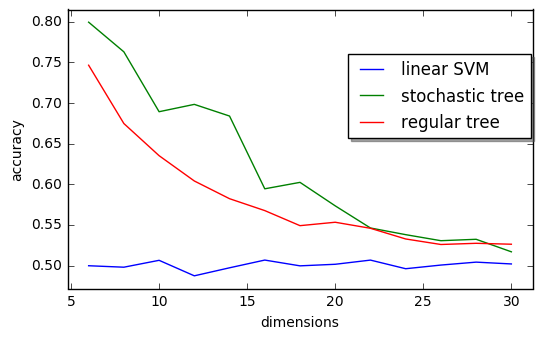

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# ax.plot(d_range,[maj[m].mean() for m in d_range], label = 'majority')
ax.plot(d_range,[svm_scores_means[m].mean() for m in d_range], label = 'linear SVM')
ax.plot(d_range,[stochastic_scores_means[m].mean() for m in d_range], label = 'stochastic tree')
ax.plot(d_range,[tree_scores_means[m].mean() for m in d_range], label = 'regular tree')

ax.margins(0.05) # 5% padding in all directions
# legend = ax.legend(lbbox_to_anchor=(1.1, 1.05), shadow=True)

ax.set_xlabel('dimensions')
ax.set_ylabel('accuracy')

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.87),
          fancybox=False, shadow=True, ncol=1)

plt.show()
# fig.savefig(r'c:\temp\multi-dim-xor-simulation.pdf')

In [10]:
# tree_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), X, y, cv=5)
# print "regular"
# print tree_scores.mean()

In [11]:
# gaus_scores = cross_val_score(svm.SVC(kernel='rbf', gamma=2), X, y, cv=5)
# print "gauss"
# print gaus_scores.mean()